## Create the figures used in Stochastic Variance Reduced Gradient Plug-and-Play Methods for Solving Image Reconnstruction Problems (ICIP 2021)

In [1]:
%matplotlib inline 

from imports import *
import pickle

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=24)  # fontsize of the figure title

# Figures 1: Compare Image Fidelity for Different Algorithms 

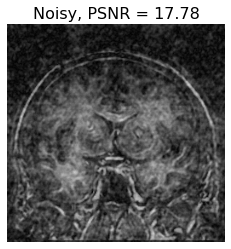

In [3]:
np.random.seed(0)
main_problem = CSMRI('./data/Set12/13.png', H=256, W=256, sample_prob=0.5, sigma=5)

psnr_display(img_path='./data/Set12/13.png', output=main_problem.noisy, title="Noisy")

In [4]:
np.random.seed(0)
denoiser = NLMDenoiser()
z_SVRG_1, time_SVRG_1, psnr_SVRG_1, zs_SVRG = pnp_svrg(main_problem, denoiser=denoiser, eta=2500, tt=200, T2=20, mini_batch_size=2000, verbose=True)

433002

After gradient update: 40 3 25.330877835677633
After denoising update: 40 3 25.328602801542225

After gradient update: 40 4 25.331439801878926
After denoising update: 40 4 25.329170265614287

After gradient update: 40 5 25.331999892264072
After denoising update: 40 5 25.32973667435033

After gradient update: 40 6 25.332559679359505
After denoising update: 40 6 25.33030156007436

After gradient update: 40 7 25.333116460525083
After denoising update: 40 7 25.330862231867158

After gradient update: 40 8 25.333670313721175
After denoising update: 40 8 25.331421366791194

After gradient update: 40 9 25.334222214735572
After denoising update: 40 9 25.33197950795386

After gradient update: 40 10 25.334772909319163
After denoising update: 40 10 25.3325360606495

After gradient update: 40 11 25.33532171835944
After denoising update: 40 11 25.333091081622065

After gradient update: 40 12 25.335868762159702
After denoising update: 40 12 25.3336429384794

After gradient update: 40 13 25.33

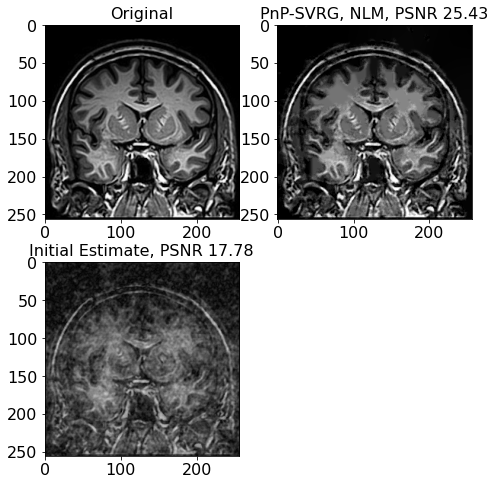

In [5]:
import matplotlib.gridspec as gridspec

length_x_axis = 50
length_y_axis = 50

rows  = 2
columns = 4

fig_height = 8.

height = length_y_axis * rows
width = length_x_axis  * columns

plot_aspect_ratio= float(width)/float(height)

fig = plt.figure(figsize=(fig_height  * plot_aspect_ratio, fig_height ))
gs = gridspec.GridSpec(2, 4, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0, 0])
ax1.imshow(main_problem.original, cmap='gray', vmin=0, vmax=1)
ax1.title.set_text('Original')

ax2 = plt.subplot(gs[1, 0])
ax2.imshow(main_problem.noisy, cmap='gray', vmin=0, vmax=1)
ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, main_problem.noisy))

ax3 = plt.subplot(gs[0, 1])
ax3.imshow(z_SVRG_1, cmap='gray', vmin=0, vmax=1)
ax3.title.set_text("PnP-SVRG, NLM, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SVRG_1))

In [ ]:
np.random.seed(0)
denoiser = NLMDenoiser()
z_SARAH_1, time_SARAH_1, psnr_SARAH_1, zs_SARAH = pnp_sarah(main_problem, denoiser=denoiser, eta=2500, tt=200, T2=20, mini_batch_size=2000, verbose=True)

In [ ]:
import matplotlib.gridspec as gridspec

length_x_axis = 50
length_y_axis = 50

rows  = 2
columns = 4

fig_height = 8.

height = length_y_axis * rows
width = length_x_axis  * columns

plot_aspect_ratio= float(width)/float(height)

fig = plt.figure(figsize=(fig_height  * plot_aspect_ratio, fig_height ))
gs = gridspec.GridSpec(2, 4, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0, 0])
ax1.imshow(main_problem.original, cmap='gray', vmin=0, vmax=1)
ax1.title.set_text('Original')

ax2 = plt.subplot(gs[1, 0])
ax2.imshow(main_problem.noisy, cmap='gray', vmin=0, vmax=1)
ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, main_problem.noisy))

ax3 = plt.subplot(gs[0, 1])
ax3.imshow(z_SARAH_1, cmap='gray', vmin=0, vmax=1)
ax3.title.set_text("PnP-SARAH, NLM, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SARAH_1))

In [6]:
np.random.seed(0)
denoiser = NLMDenoiser()
z_GD_1, time_GD_1, psnr_GD_1, zs_GD = pnp_gd(main_problem, denoiser=denoiser, eta=2000, tt=200, verbose=True)

ing:  23.16211007863391
144 Before denoising:  23.19301349703248
144 After denoising:  23.171065361890207
145 Before denoising:  23.20187856805717
145 After denoising:  23.180011135144476
146 Before denoising:  23.210732998218226
146 After denoising:  23.18894514518187
147 Before denoising:  23.21957491897996
147 After denoising:  23.197863205439447
148 Before denoising:  23.228400593832088
148 After denoising:  23.20676887990154
149 Before denoising:  23.23721342150418
149 After denoising:  23.215649961507665
150 Before denoising:  23.246001340027668
150 After denoising:  23.224492546289525
151 Before denoising:  23.254750096214394
151 After denoising:  23.233294394356207
152 Before denoising:  23.26345733117302
152 After denoising:  23.242050974409345
153 Before denoising:  23.27211849123217
153 After denoising:  23.250747188619883
154 Before denoising:  23.280719101669515
154 After denoising:  23.25937016578831
155 Before denoising:  23.289246691624953
155 After denoising:  23.26791

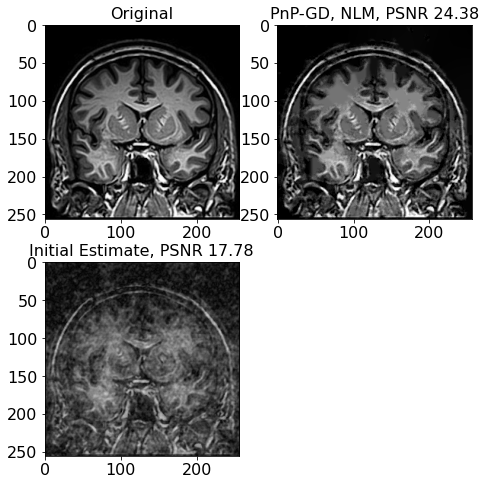

In [7]:
import matplotlib.gridspec as gridspec

length_x_axis = 50
length_y_axis = 50

rows  = 2
columns = 4

fig_height = 8.

height = length_y_axis * rows
width = length_x_axis  * columns

plot_aspect_ratio= float(width)/float(height)

fig = plt.figure(figsize=(fig_height  * plot_aspect_ratio, fig_height ))
gs = gridspec.GridSpec(2, 4, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0, 0])
ax1.imshow(main_problem.original, cmap='gray', vmin=0, vmax=1)
ax1.title.set_text('Original')

ax2 = plt.subplot(gs[1, 0])
ax2.imshow(main_problem.noisy, cmap='gray', vmin=0, vmax=1)
ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, main_problem.noisy))

ax3 = plt.subplot(gs[0, 1])
ax3.imshow(z_SVRG_1, cmap='gray', vmin=0, vmax=1)
ax3.title.set_text("PnP-GD, NLM, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_GD_1))

In [8]:
np.random.seed(0)
denoiser = NLMDenoiser()
z_SGD_1, time_SGD_1, psnr_SGD_1, zs_SGD = pnp_sgd(main_problem, denoiser=denoiser, eta=1000, tt=200, mini_batch_size=2000, verbose=True)

1535530108038
631 24.013136975855364
632 24.01574931599867
633 24.018541144490545
634 24.02229251937321
635 24.024776661436714
636 24.027098508277696
637 24.028065682739715
638 24.031486817333704
639 24.035067068999805
640 24.037074750922635
641 24.038493019519336
642 24.04139704395632
643 24.044500672397536
644 24.04570753705447
645 24.047443464698702
646 24.049167362094156
647 24.052460357533004
648 24.053392880961404
649 24.056195979135534
650 24.0585338927505
651 24.0601549986133
652 24.063297892986334
653 24.064479407136318
654 24.06610052556653
655 24.0707582160804
656 24.07286975730546
657 24.073709479377307
658 24.074074218232756
659 24.077234643285614
660 24.07913898685619
661 24.081245387817933
662 24.08182965416138
663 24.083865908428233
664 24.084787833144148
665 24.08702829664026
666 24.088073014187014
667 24.090132724918135
668 24.09179509702276
669 24.09308686957038
670 24.09385538695198
671 24.095707037917315
672 24.097370673532286
673 24.100069610350804
674 24.10128243

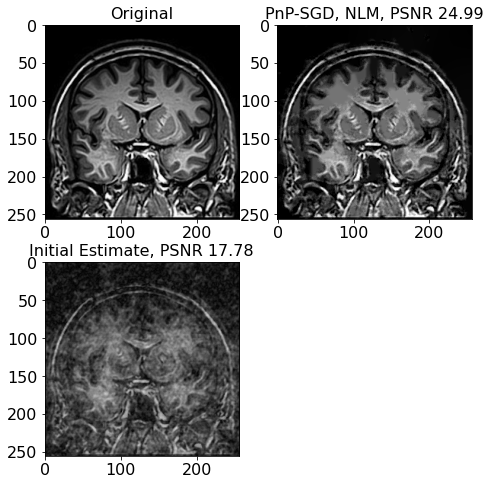

In [9]:
import matplotlib.gridspec as gridspec

length_x_axis = 50
length_y_axis = 50

rows  = 2
columns = 4

fig_height = 8.

height = length_y_axis * rows
width = length_x_axis  * columns

plot_aspect_ratio= float(width)/float(height)

fig = plt.figure(figsize=(fig_height  * plot_aspect_ratio, fig_height ))
gs = gridspec.GridSpec(2, 4, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0, 0])
ax1.imshow(main_problem.original, cmap='gray', vmin=0, vmax=1)
ax1.title.set_text('Original')

ax2 = plt.subplot(gs[1, 0])
ax2.imshow(main_problem.noisy, cmap='gray', vmin=0, vmax=1)
ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, main_problem.noisy))

ax3 = plt.subplot(gs[0, 1])
ax3.imshow(z_SVRG_1, cmap='gray', vmin=0, vmax=1)
ax3.title.set_text("PnP-SGD, NLM, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SGD_1))

In [10]:
np.random.seed(0)
denoiser = CNNDenoiser(device=device, cnn_decay=0.96)
z_SVRG_2, time_SVRG_2, psnr_SVRG_2, zs_SVRG = pnp_svrg(main_problem, denoiser=denoiser, eta=12500, tt=30, T2=5, mini_batch_size=2000, verbose=True)

After gradient update: 0 0 18.69690510953681
After denoising update: 0 0 15.867992848395616

After gradient update: 0 1 16.465887029646595
After denoising update: 0 1 16.784232723921964

After gradient update: 0 2 17.374828049809008
After denoising update: 0 2 15.991475854199441

After gradient update: 0 3 16.463129271222506
After denoising update: 0 3 16.099167131658767

After gradient update: 0 4 16.467164697063335
After denoising update: 0 4 15.59323316791275

After gradient update: 1 0 17.32807497813333
After denoising update: 1 0 16.064310671608894

After gradient update: 1 1 16.960448240074115
After denoising update: 1 1 16.691973481425144

After gradient update: 1 2 18.347845385560927
After denoising update: 1 2 16.756621194411814

After gradient update: 1 3 17.908170178265404
After denoising update: 1 3 16.7563205085814

After gradient update: 1 4 18.17126839136568
After denoising update: 1 4 17.326118915913703

After gradient update: 2 0 18.663955165616112
After denoising upda

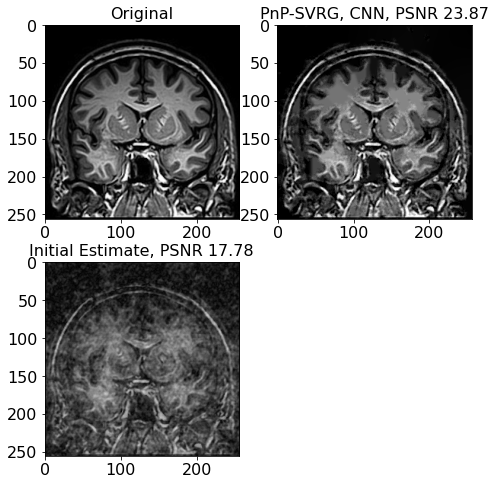

In [11]:
import matplotlib.gridspec as gridspec

length_x_axis = 50
length_y_axis = 50

rows  = 2
columns = 4

fig_height = 8.

height = length_y_axis * rows
width = length_x_axis  * columns

plot_aspect_ratio= float(width)/float(height)

fig = plt.figure(figsize=(fig_height  * plot_aspect_ratio, fig_height ))
gs = gridspec.GridSpec(2, 4, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0, 0])
ax1.imshow(main_problem.original, cmap='gray', vmin=0, vmax=1)
ax1.title.set_text('Original')

ax2 = plt.subplot(gs[1, 0])
ax2.imshow(main_problem.noisy, cmap='gray', vmin=0, vmax=1)
ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, main_problem.noisy))

ax3 = plt.subplot(gs[0, 1])
ax3.imshow(z_SVRG_1, cmap='gray', vmin=0, vmax=1)
ax3.title.set_text("PnP-SVRG, CNN, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SVRG_2))

In [12]:
np.random.seed(0)
denoiser = CNNDenoiser(device=device, cnn_decay=0.96)
z_GD_2, time_GD_2, psnr_GD_2, zs_GD = pnp_gd(main_problem, denoiser=denoiser, eta=10000, tt=30, verbose=True)

0 Before denoising:  18.519426161029973
0 After denoising:  15.663889339463864
1 Before denoising:  17.1096874670074
1 After denoising:  16.671250328836603
2 Before denoising:  17.585801025409374
2 After denoising:  16.213063697972395
3 Before denoising:  17.470265913039547
3 After denoising:  16.175530545700344
4 Before denoising:  17.16022850870177
4 After denoising:  16.30144836954043
5 Before denoising:  17.472463685822774
5 After denoising:  16.494335849407857
6 Before denoising:  17.492098648333126
6 After denoising:  16.634674246795647
7 Before denoising:  17.75561827570753
7 After denoising:  16.674286109104305
8 Before denoising:  17.690175910043948
8 After denoising:  16.760941879390842
9 Before denoising:  17.858356595177995
9 After denoising:  16.901243959995483
10 Before denoising:  17.92798226869439
10 After denoising:  16.963022868192745
11 Before denoising:  18.04785826099803
11 After denoising:  17.1767771121162
12 Before denoising:  18.21037908599131
12 After denoisin

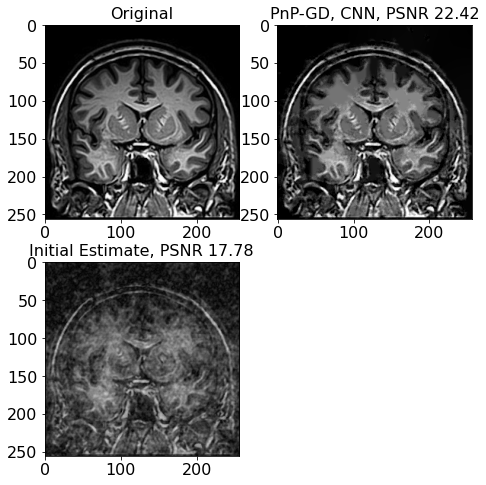

In [13]:
import matplotlib.gridspec as gridspec

length_x_axis = 50
length_y_axis = 50

rows  = 2
columns = 4

fig_height = 8.

height = length_y_axis * rows
width = length_x_axis  * columns

plot_aspect_ratio= float(width)/float(height)

fig = plt.figure(figsize=(fig_height  * plot_aspect_ratio, fig_height ))
gs = gridspec.GridSpec(2, 4, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0, 0])
ax1.imshow(main_problem.original, cmap='gray', vmin=0, vmax=1)
ax1.title.set_text('Original')

ax2 = plt.subplot(gs[1, 0])
ax2.imshow(main_problem.noisy, cmap='gray', vmin=0, vmax=1)
ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, main_problem.noisy))

ax3 = plt.subplot(gs[0, 1])
ax3.imshow(z_SVRG_1, cmap='gray', vmin=0, vmax=1)
ax3.title.set_text("PnP-GD, CNN, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_GD_2))

In [14]:
np.random.seed(0)
denoiser = CNNDenoiser(device=device, cnn_decay=0.95)
z_SGD_2, time_SGD_2, psnr_SGD_2, zs_SGD = pnp_sgd(main_problem, denoiser=denoiser, eta=4000, tt=30, mini_batch_size=2000, verbose=True)

0 15.913550690497393
1 15.98185673857273
2 15.201265773730013
3 15.575456715959454
4 15.004360026414094
5 15.621765562807145
6 15.65265624116095
7 15.618187930879838
8 15.731199752057329
9 15.719060794927188
10 15.748579132342549
11 15.77201288457898
12 15.80412821834859
13 15.834531243429542
14 15.888929340908449
15 15.976030491683746
16 15.991392066994228
17 16.028739362160415
18 16.029600318307576
19 16.120485113929632
20 16.16960784104119
21 16.222251941581444
22 16.25305580365835
23 16.35204669696346
24 16.43186439513087
25 16.512044899840397
26 16.57154016234569
27 16.59536578676312
28 16.716031459327464
29 16.73121023335814
30 16.778751685560927
31 16.79391015548529
32 16.84314227797985
33 16.970161433544884
34 17.488578835311117
35 17.54239908762386
36 17.645389352031525
37 17.717163432101838
38 17.79874978341164
39 17.86721615588111
40 17.968183343145107
41 18.06137607833349
42 18.102827735015744
43 18.171681722935244
44 18.262125659112765
45 18.321570857271624
46 18.365456815

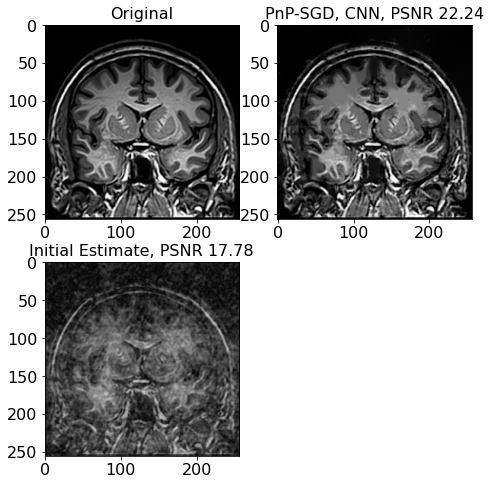

In [15]:
import matplotlib.gridspec as gridspec

length_x_axis = 50
length_y_axis = 50

rows  = 2
columns = 4

fig_height = 8.

height = length_y_axis * rows
width = length_x_axis  * columns

plot_aspect_ratio= float(width)/float(height)

fig = plt.figure(figsize=(fig_height  * plot_aspect_ratio, fig_height ))
gs = gridspec.GridSpec(2, 4, wspace=0.2, hspace=0.2)

ax1 = plt.subplot(gs[0, 0])
ax1.imshow(main_problem.original, cmap='gray', vmin=0, vmax=1)
ax1.title.set_text('Original')

ax2 = plt.subplot(gs[1, 0])
ax2.imshow(main_problem.noisy, cmap='gray', vmin=0, vmax=1)
ax2.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, main_problem.noisy))

ax3 = plt.subplot(gs[0, 1])
ax3.imshow(z_SVRG_1, cmap='gray', vmin=0, vmax=1)
ax3.title.set_text("PnP-SGD, CNN, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SGD_2))

In [17]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(main_problem.original, cmap='gray', vmin=0, vmax=1)
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/original.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(main_problem.noisy, cmap='gray', vmin=0, vmax=1)
plt.title("Initialization, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, main_problem.noisy), fontsize=12)
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/noisy.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SVRG_1, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SVRG_1))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/nlm_svrg.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SARAH_1, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SARAH, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SARAH_1))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/nlm_sarah.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SAGA_1, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SAGA, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SAGA_1))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/nlm_saga.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SGD_1, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SGD, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SGD_1))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/nlm_sgd.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_GD_1, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-GD, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_GD_1))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/nlm_gd.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SARAH_2, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SARAH, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SARAH_2))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/cnn_sarah.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SAGA_2, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SAGA, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SAGA_2))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/cnn_saga.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SVRG_2, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SVRG, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SVRG_2))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/cnn_svrg.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_SGD_2, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-SGD, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_SGD_2))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/cnn_sgd.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
imgplot = plt.imshow(z_GD_2, cmap='gray', vmin=0, vmax=1)
plt.title("PnP-GD, PSNR %.2f" % peak_signal_noise_ratio(main_problem.original, z_GD_2))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_algorithms/cnn_gd.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './figures/fig1/original.eps'

In [ ]:
with open('fig1.pkl', 'wb') as f:  
    pickle.dump([main_problem, z_SVRG, z_SGD, z_GD, time_SVRG, time_GD, time_SGD], f)

# Figure 2(a): Compare PSNR over time using NLM

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


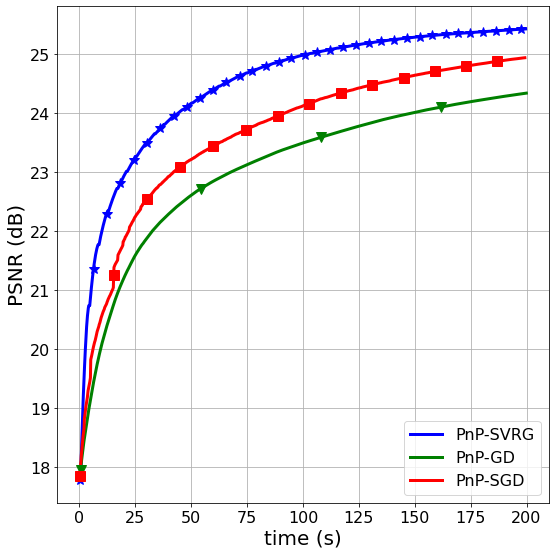

In [119]:
# Figure to display iteration count/ clock time vs PSNR for all algorithms
psnr_fig = plt.figure(figsize=(8,8))
psnr_ax = psnr_fig.add_subplot(1, 1, 1)

psnr_ax.plot(np.cumsum(time_SVRG_1), psnr_SVRG_1,"b", linewidth=3)
psnr_ax.plot(np.cumsum(time_GD_1), psnr_GD_1,"g", linewidth=3)
psnr_ax.plot(np.cumsum(time_SGD_1), psnr_SGD_1,"r", linewidth=3)

psnr_ax.plot(np.cumsum(time_SVRG_1)[::30], psnr_SVRG_1[::30],"b*", markersize=10)
psnr_ax.plot(np.cumsum(time_GD_1)[::100], psnr_GD_1[::100],"gv", markersize=10)
psnr_ax.plot(np.cumsum(time_SGD_1)[::100], psnr_SGD_1[::100],"rs", markersize=10)

psnr_ax.set(xlabel='time (s)', ylabel='PSNR (dB)')
psnr_ax.legend(('PnP-SVRG', 'PnP-GD', 'PnP-SGD'), loc='lower right')
psnr_ax.grid()

psnr_fig.tight_layout()

plt.savefig("./figures/csmri/psnr_over_time/psnr_over_time.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)

plt.show()




## Figure 2(b): Compare Sampling Ratio for each PnP Algorithm

In [ ]:
num_probs = 20
num_trials = 3
sample_probs = np.linspace(.1, 1, num_probs)

prob_vs_psnr_SVRG = []
prob_vs_psnr_GD = []
prob_vs_psnr_SGD = []

for i in range(num_probs):
    samp_ratio_SVRG = []
    samp_ratio_GD = []
    samp_ratio_SGD = []
    samp_ratio_LSVRG = []
    for j in range(num_trials):
        samp_ratio_problem = create_problem('./data/Set12/13.png', H=256, W=256, sigma=5, sample_prob=sample_probs[i])
        
        z_SVRG, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(samp_ratio_problem, denoiser=denoiser, eta=2000, tt=200, T2=30, mini_batch_size=1000, verbose=True)
        samp_ratio_SVRG.append(psnr_SVRG[-1])

        z_GD, time_GD, psnr_GD, zs_GD = pnp_gd(samp_ratio_problem, denoiser=denoiser, eta=2000, tt=200, verbose=True)
        samp_ratio_GD.append(psnr_GD[-1])

        z_SGD, time_SGD, psnr_SGD, zs_SGD = pnp_sgd(samp_ratio_problem, denoiser=denoiser, eta=1500, tt=200, mini_batch_size=5000, verbose=True)
        samp_ratio_SGD.append(psnr_SGD[-1])
    prob_vs_psnr_SVRG.append(np.average(samp_ratio_SVRG))
    prob_vs_psnr_GD.append(np.average(samp_ratio_GD))
    prob_vs_psnr_SGD.append(np.average(samp_ratio_SGD))


In [ ]:
# Figure to display iteration count/ clock time vs PSNR for all algorithms
psnr_fig = plt.figure(figsize=(8,8))
psnr_ax = psnr_fig.add_subplot(1, 1, 1)

psnr_ax.plot(sample_probs, prob_vs_psnr_SVRG, "b*-")
psnr_ax.plot(sample_probs, prob_vs_psnr_GD, "gv-")
psnr_ax.plot(sample_probs, prob_vs_psnr_SGD, "rs-")


psnr_ax.set(xlabel='sampling rate (p = m/n)', ylabel='PSNR (dB)')
psnr_ax.legend(('PnP-SVRG', 'PnP-GD', 'PnP-SGD'), loc='lower right')
psnr_ax.grid()
plt.xlim(0.1, 1.0)
psnr_fig.tight_layout()

plt.savefig("./figures/csmri/samp_ratio/samp_ratio.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [ ]:
with open('fig4.pkl', 'wb') as f:  
    pickle.dump([samp_ratio_problem, sample_probs, prob_vs_psnr_SVRG, prob_vs_psnr_GD, prob_vs_psnr_SGD], f)

## Figure 3: Compare Image Denoising Routines with PnP-SVRG using RGB Images

(256, 256, 4)


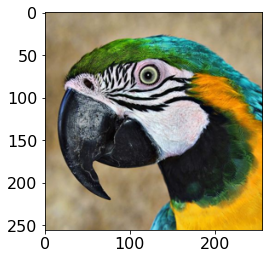

In [122]:
img=np.array(Image.open('./data/Set12/image.png').resize((256,256)), dtype=int)
print(img.shape)
imgplot = plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


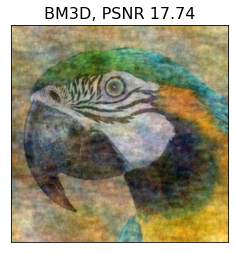

In [123]:
slice0 = img[:,:,0]
slice1 = img[:,:,1]
slice2 = img[:,:,2]

np.random.seed(0)
slice0_res = CSMRI(img=img[:,:,0], H=256, W=256, sigma=5, sample_prob=0.5)
np.random.seed(0)
slice1_res = CSMRI(img=img[:,:,1], H=256, W=256, sigma=5, sample_prob=0.5)
np.random.seed(0)
slice2_res = CSMRI(img=img[:,:,2], H=256, W=256, sigma=5, sample_prob=0.5)

noisy = np.zeros((256,256,3), 'float')
noisy[:, :, 0] = slice0_res.noisy
noisy[:, :, 1] = slice1_res.noisy
noisy[:, :, 2] = slice2_res.noisy

imgplot = plt.imshow(noisy)
plt.title("BM3D, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, noisy))
plt.xticks([])
plt.yticks([])
plt.show()

In [147]:
denoiser = CNNDenoiser(device=device, cnn_decay=0.99)
np.random.seed(0)
z_slice0_cnn, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice0_res, denoiser=denoiserCNN, eta=13000, tt=20, T2=5, mini_batch_size=2000, verbose=True)
z_slice1_cnn, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice1_res, denoiser=denoiserCNN, eta=13000, tt=20, T2=5, mini_batch_size=2000, verbose=True)
z_slice2_cnn, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice2_res, denoiser=denoiserCNN, eta=13000, tt=20, T2=5, mini_batch_size=2000, verbose=True)

After gradient update: 0 0 17.70960409027402
After denoising update: 0 0 16.50172670216797

After gradient update: 0 1 17.36685113234002
After denoising update: 0 1 17.377525162810525

After gradient update: 0 2 18.154103445557723
After denoising update: 0 2 17.437710167569076

After gradient update: 0 3 18.08149099921836
After denoising update: 0 3 18.412134524530693

After gradient update: 0 4 18.900386929451603
After denoising update: 0 4 18.85475716310887

After gradient update: 1 0 20.248942560683297
After denoising update: 1 0 19.455230027994915

After gradient update: 1 1 20.548066239286875
After denoising update: 1 1 19.984243076617183

After gradient update: 1 2 21.283658370346195
After denoising update: 1 2 20.700319439941907

After gradient update: 1 3 21.70171377851802
After denoising update: 1 3 21.2122000214433

After gradient update: 1 4 22.114171830867846
After denoising update: 1 4 21.6477669353351

After gradient update: 2 0 22.606107249761838
After denoising update: 

After gradient update: 17 3 26.011797641877486
After denoising update: 17 3 26.012011384644836

After gradient update: 17 4 26.00156202615578
After denoising update: 17 4 26.001755535013476

After gradient update: 0 0 19.46493134563027
After denoising update: 0 0 17.104349682610895

After gradient update: 0 1 17.69824699629122
After denoising update: 0 1 17.903734200443875

After gradient update: 0 2 18.419553114587057
After denoising update: 0 2 17.682539105505764

After gradient update: 0 3 18.163767010127614
After denoising update: 0 3 18.47050655842419

After gradient update: 0 4 18.867481942634868
After denoising update: 0 4 18.432199304593023

After gradient update: 1 0 20.113663060288822
After denoising update: 1 0 19.20861510944842

After gradient update: 1 1 19.97280813072539
After denoising update: 1 1 19.915551490546996

After gradient update: 1 2 21.502719790222663
After denoising update: 1 2 20.569489679204146

After gradient update: 1 3 21.637590096903825
After denoising 

After denoising update: 17 1 25.555710950882556

After gradient update: 17 2 25.555974581374592
After denoising update: 17 2 25.55619666781523

After gradient update: 17 3 25.55335584053262
After denoising update: 17 3 25.553557265256494

After gradient update: 17 4 25.54763437825961
After denoising update: 17 4 25.547817028050233

After gradient update: 0 0 18.887124335704655
After denoising update: 0 0 17.10169359883225

After gradient update: 0 1 17.821137739017285
After denoising update: 0 1 17.777957421892147

After gradient update: 0 2 18.355992310851917
After denoising update: 0 2 17.842357996008158

After gradient update: 0 3 18.368253429844657
After denoising update: 0 3 18.75576849942436

After gradient update: 0 4 19.13507950943314
After denoising update: 0 4 18.82233986706041

After gradient update: 1 0 20.551533233959532
After denoising update: 1 0 19.96687259700475

After gradient update: 1 1 20.696964742611648
After denoising update: 1 1 20.578820762762554

After gradien

After denoising update: 16 4 27.35137827059356

After gradient update: 17 0 27.36986432769197
After denoising update: 17 0 27.370295044409914

After gradient update: 17 1 27.380196151257103
After denoising update: 17 1 27.380585520430806

After gradient update: 17 2 27.382009882577375
After denoising update: 17 2 27.382361325700366

After gradient update: 17 3 27.37533422119111
After denoising update: 17 3 27.375650928695915

After gradient update: 17 4 27.360225813056193
After denoising update: 17 4 27.360510773934482



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


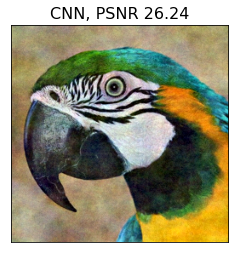

In [148]:
denoised_cnn = np.zeros((256,256,3), 'float')
denoised_cnn[..., 0] = z_slice0_cnn
denoised_cnn[..., 1] = z_slice1_cnn
denoised_cnn[..., 2] = z_slice2_cnn

imgplot = plt.imshow(denoised_cnn)
plt.title("CNN, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_cnn))
plt.xticks([])
plt.yticks([])
plt.show()

In [196]:
denoiserBM3D = BM3DDenoiser(noise_est=1.5, filter_decay=0.9)
np.random.seed(0)
z_slice0_bm3d, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice0_res, denoiser=denoiserBM3D, eta=10000, tt=100, T2=5, mini_batch_size=2000, verbose=True)
z_slice1_bm3d, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice1_res, denoiser=denoiserBM3D, eta=10000, tt=100, T2=5, mini_batch_size=2000, verbose=True)
z_slice2_bm3d, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice2_res, denoiser=denoiserBM3D, eta=10000, tt=100, T2=5, mini_batch_size=2000, verbose=True)

After gradient update: 0 0 17.474176382088068
After denoising update: 0 0 15.957365612751161

After gradient update: 0 1 16.600093499573006
After denoising update: 0 1 16.018219785797964

After gradient update: 0 2 16.571837389148932
After denoising update: 0 2 16.061498326740082

After gradient update: 0 3 16.521856315199535
After denoising update: 0 3 16.056422168429847

After gradient update: 0 4 16.424292644350402
After denoising update: 0 4 16.012164622630053

After gradient update: 1 0 17.31713141511568
After denoising update: 1 0 16.395509117836276

After gradient update: 1 1 17.6905814544539
After denoising update: 1 1 16.7211158771171

After gradient update: 1 2 17.97872481092328
After denoising update: 1 2 17.00258985498977

After gradient update: 1 3 18.19157379965437
After denoising update: 1 3 17.231832875882468

After gradient update: 1 4 18.310728869555646
After denoising update: 1 4 17.389263560187292

After gradient update: 2 0 18.405913546049174
After denoising update

After denoising update: 4 2 19.955145018850324

After gradient update: 4 3 21.01757345620099
After denoising update: 4 3 20.26826682233792

After gradient update: 4 4 21.33539475985411
After denoising update: 4 4 20.617340868391505

After gradient update: 5 0 21.55050999494592
After denoising update: 5 0 20.840158477797623

After gradient update: 5 1 21.78966390858008
After denoising update: 5 1 21.103397839379387

After gradient update: 5 2 22.065899537762448
After denoising update: 5 2 21.399141410258935

After gradient update: 5 3 22.369357617202223
After denoising update: 5 3 21.721227436260996

After gradient update: 5 4 22.690460063073235
After denoising update: 5 4 22.06708800107925

After gradient update: 6 0 22.887013701251394
After denoising update: 6 0 22.277393568470757

After gradient update: 6 1 23.106390824220128
After denoising update: 6 1 22.528951965957976

After gradient update: 6 2 23.362520135104965
After denoising update: 6 2 22.816522848950683

After gradient upd

After denoising update: 9 0 26.131554486230204

After gradient update: 9 1 26.4113657146532
After denoising update: 9 1 26.26513884750571

After gradient update: 9 2 26.5279124543202
After denoising update: 9 2 26.406963267345386

After gradient update: 9 3 26.646137243726802
After denoising update: 9 3 26.54960170180467

After gradient update: 9 4 26.757580152033814
After denoising update: 9 4 26.68406448350805

After gradient update: 10 0 26.81784219487589
After denoising update: 10 0 26.753722490875536

After gradient update: 10 1 26.8767262088428
After denoising update: 10 1 26.826283483712977

After gradient update: 10 2 26.93457029078978
After denoising update: 10 2 26.899064788001283

After gradient update: 10 3 26.98814307987622
After denoising update: 10 3 26.967514911825432

After gradient update: 10 4 27.032314643851812
After denoising update: 10 4 27.024653074749992

After gradient update: 11 0 27.057574695118248
After denoising update: 11 0 27.05394059061994

After gradien

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


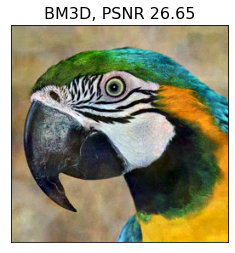

In [197]:
denoised_bm3d = np.zeros((256,256,3), 'float')
denoised_bm3d[..., 0] = z_slice0_bm3d
denoised_bm3d[..., 1] = z_slice1_bm3d
denoised_bm3d[..., 2] = z_slice2_bm3d

imgplot = plt.imshow(denoised_bm3d)
plt.title("BM3D, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_bm3d))
plt.xticks([])
plt.yticks([])
plt.show()

In [204]:
denoiserTV = TVDenoiser()
np.random.seed(0)
z_slice0_tv, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice0_res, denoiser=denoiserTV, eta=11000, tt=100, T2=5, mini_batch_size=2000, verbose=True)
z_slice1_tv, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice1_res, denoiser=denoiserTV, eta=11000, tt=100, T2=5, mini_batch_size=2000, verbose=True)
z_slice2_tv, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice2_res, denoiser=denoiserTV, eta=11000, tt=100, T2=5, mini_batch_size=2000, verbose=True)

After gradient update: 0 0 17.552814682121223
After denoising update: 0 0 17.511799433380922

After gradient update: 0 1 18.37351541892182
After denoising update: 0 1 18.368863857047998

After gradient update: 0 2 19.159992096492427
After denoising update: 0 2 19.151506954851328

After gradient update: 0 3 19.791886389283487
After denoising update: 0 3 19.783608536138647

After gradient update: 0 4 20.17768132845243
After denoising update: 0 4 20.171165416598164

After gradient update: 1 0 20.324268156181397
After denoising update: 1 0 20.313053917761017

After gradient update: 1 1 20.431360557411683
After denoising update: 1 1 20.422359413412387

After gradient update: 1 2 20.50349421921263
After denoising update: 1 2 20.498683644672923

After gradient update: 1 3 20.54097958308679
After denoising update: 1 3 20.540978681259112

After gradient update: 1 4 20.543263447331206
After denoising update: 1 4 20.54836936487332

After gradient update: 2 0 20.58962956576062
After denoising upda

After denoising update: 17 2 21.20037030829165

After gradient update: 17 3 21.201969431639878
After denoising update: 17 3 21.205074393470575

After gradient update: 17 4 21.20663680170741
After denoising update: 17 4 21.20975940880653

After gradient update: 18 0 21.211277632636797
After denoising update: 18 0 21.21434703713244

After gradient update: 18 1 21.215843621861076
After denoising update: 18 1 21.2189156619904

After gradient update: 18 2 21.22038885077959
After denoising update: 18 2 21.223471722969688

After gradient update: 18 3 21.224920267455527
After denoising update: 18 3 21.228010876588552

After gradient update: 18 4 21.22943119004717
After denoising update: 18 4 21.23253830996157

After gradient update: 19 0 21.23393451996872
After denoising update: 19 0 21.236982429611228

After gradient update: 19 1 21.23836368831617
After denoising update: 19 1 21.241407601292522

After gradient update: 19 2 21.24276781118286
After denoising update: 19 2 21.245809612503663

Aft

After denoising update: 34 4 21.521437421785876

After gradient update: 35 0 21.52186363285334
After denoising update: 35 0 21.524372302602863

After gradient update: 35 1 21.524792746561964
After denoising update: 35 1 21.527301129649295

After gradient update: 35 2 21.527715338275858
After denoising update: 35 2 21.530229737279292

After gradient update: 35 3 21.530637051720873
After denoising update: 35 3 21.533149483606895

After gradient update: 35 4 21.533552256784105
After denoising update: 35 4 21.536063383213893

After gradient update: 36 0 21.536455783354064
After denoising update: 36 0 21.538945144331144

After gradient update: 36 1 21.539332308941205
After denoising update: 36 1 21.541815776236092

After gradient update: 36 2 21.542198629474502
After denoising update: 36 2 21.544675793491383

After gradient update: 36 3 21.54505069318433
After denoising update: 36 3 21.54752657629965

After gradient update: 36 4 21.547894497902284
After denoising update: 36 4 21.55037091901

After denoising update: 52 0 21.736552585350267

After gradient update: 52 1 21.73658912618525
After denoising update: 52 1 21.738662743017333

After gradient update: 52 2 21.738696435915152
After denoising update: 52 2 21.74076762602502

After gradient update: 52 3 21.740799672231958
After denoising update: 52 3 21.74286707443936

After gradient update: 52 4 21.742895882273633
After denoising update: 52 4 21.744961985840984

After gradient update: 53 0 21.74498658722093
After denoising update: 53 0 21.747040637788277

After gradient update: 0 0 19.338816754268315
After denoising update: 0 0 19.279177803215592

After gradient update: 0 1 19.977073700390736
After denoising update: 0 1 19.97026559262008

After gradient update: 0 2 20.596828703295955
After denoising update: 0 2 20.584782876922514

After gradient update: 0 3 21.089405486648964
After denoising update: 0 3 21.07680349515014

After gradient update: 0 4 21.404465237133913
After denoising update: 0 4 21.393941363275147

After g

After denoising update: 16 1 22.43436696605002

After gradient update: 16 2 22.43701794745939
After denoising update: 16 2 22.439608054900376

After gradient update: 16 3 22.4422379660771
After denoising update: 16 3 22.444825187114915

After gradient update: 16 4 22.447431754008676
After denoising update: 16 4 22.450038615142223

After gradient update: 17 0 22.452606159629724
After denoising update: 17 0 22.45512084137646

After gradient update: 17 1 22.45767101761507
After denoising update: 17 1 22.460175593852757

After gradient update: 17 2 22.462704956514724
After denoising update: 17 2 22.46522749073065

After gradient update: 17 3 22.467733421590278
After denoising update: 17 3 22.47026252301071

After gradient update: 17 4 22.472743663801968
After denoising update: 17 4 22.475269420603627

After gradient update: 18 0 22.47770822464801
After denoising update: 18 0 22.48016726611436

After gradient update: 18 1 22.482588859962718
After denoising update: 18 1 22.48502217784771

Af

After denoising update: 33 3 22.777659585665372

After gradient update: 33 4 22.77876954911106
After denoising update: 33 4 22.78066271100958

After gradient update: 34 0 22.781754816426705
After denoising update: 34 0 22.783618784913013

After gradient update: 34 1 22.78470367982472
After denoising update: 34 1 22.78656532112619

After gradient update: 34 2 22.787640887989397
After denoising update: 34 2 22.789501919070823

After gradient update: 34 3 22.790566820705088
After denoising update: 34 3 22.79243398379269

After gradient update: 34 4 22.793489584244774
After denoising update: 34 4 22.795354348053486

After gradient update: 35 0 22.79639742434255
After denoising update: 35 0 22.798236347131628

After gradient update: 35 1 22.799272712931096
After denoising update: 35 1 22.801112446104778

After gradient update: 35 2 22.802142978394876
After denoising update: 35 2 22.80398561873219

After gradient update: 35 3 22.805009724596907
After denoising update: 35 3 22.80684810362783


After denoising update: 50 4 22.988719321528045

After gradient update: 51 0 22.9894305374399
After denoising update: 51 0 22.990736058812992

After gradient update: 51 1 22.99144471148002
After denoising update: 51 1 22.99274928735251

After gradient update: 51 2 22.99345475605253
After denoising update: 51 2 22.994755970098268

After gradient update: 51 3 22.99545694270735
After denoising update: 51 3 22.996753706415156

After gradient update: 51 4 22.99745183471248
After denoising update: 51 4 22.9987461958229

After gradient update: 52 0 22.999438546994217
After denoising update: 52 0 23.000721766547237

After gradient update: 52 1 23.001412856403405
After denoising update: 52 1 23.002694559094053

After gradient update: 52 2 23.003384147919736
After denoising update: 52 2 23.004660884342528

After gradient update: 52 3 23.005346948589235
After denoising update: 52 3 23.006622632229565

After gradient update: 52 4 23.0073055639385
After denoising update: 52 4 23.008579769786962

Af

After denoising update: 15 2 22.165923324182547

After gradient update: 15 3 22.167318961366846
After denoising update: 15 3 22.171354106984424

After gradient update: 15 4 22.172713149463306
After denoising update: 15 4 22.1767736894467

After gradient update: 16 0 22.178087926051717
After denoising update: 16 0 22.182052363823665

After gradient update: 16 1 22.183347703420438
After denoising update: 16 1 22.18730541610794

After gradient update: 16 2 22.188574699104855
After denoising update: 16 2 22.19253356079877

After gradient update: 16 3 22.19377203640685
After denoising update: 16 3 22.197760078733783

After gradient update: 16 4 22.198965167834718
After denoising update: 16 4 22.20295445760707

After gradient update: 17 0 22.20410609350852
After denoising update: 17 0 22.208019303489767

After gradient update: 17 1 22.20914977939762
After denoising update: 17 1 22.213060164384622

After gradient update: 17 2 22.214166129240176
After denoising update: 17 2 22.21809721113363



After denoising update: 32 4 22.517473783778875

After gradient update: 33 0 22.517552530346162
After denoising update: 33 0 22.520534098571744

After gradient update: 33 1 22.520607537722775
After denoising update: 33 1 22.52358748945049

After gradient update: 33 2 22.523654991095746
After denoising update: 33 2 22.526629716001395

After gradient update: 33 3 22.526691168794102
After denoising update: 33 3 22.52965443434198

After gradient update: 33 4 22.52971014958099
After denoising update: 33 4 22.532664975091578

After gradient update: 34 0 22.532714972269403
After denoising update: 34 0 22.53563660373974

After gradient update: 34 1 22.53568115507759
After denoising update: 34 1 22.53859847206455

After gradient update: 34 2 22.538638671405046
After denoising update: 34 2 22.541552184997826

After gradient update: 34 3 22.541588439849235
After denoising update: 34 3 22.544500089568373

After gradient update: 34 4 22.54453104465405
After denoising update: 34 4 22.54743639393892


After denoising update: 50 1 22.737710821565923

After gradient update: 50 2 22.737451644494477
After denoising update: 50 2 22.73982406597774

After gradient update: 50 3 22.73956405611767
After denoising update: 50 3 22.741936099220755

After gradient update: 50 4 22.74167233589337
After denoising update: 50 4 22.744036865951177

After gradient update: 51 0 22.743770419859505
After denoising update: 51 0 22.746121183745267

After gradient update: 51 1 22.745853132195208
After denoising update: 51 1 22.74820170676041

After gradient update: 51 2 22.74793293376903
After denoising update: 51 2 22.750273026283487

After gradient update: 51 3 22.750003552988538
After denoising update: 51 3 22.752334444536718

After gradient update: 51 4 22.75206283924153
After denoising update: 51 4 22.754389729048587

After gradient update: 52 0 22.754113741923767
After denoising update: 52 0 22.756427448624954

After gradient update: 52 1 22.756150125867492
After denoising update: 52 1 22.75846073106728

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


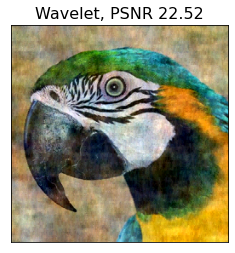

In [205]:
denoised_tv = np.zeros((256,256,3), 'float')
denoised_tv[..., 0] = z_slice0_tv
denoised_tv[..., 1] = z_slice1_tv
denoised_tv[..., 2] = z_slice2_tv

imgplot = plt.imshow(denoised_tv)
plt.title("Wavelet, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_tv))
plt.xticks([])
plt.yticks([])
plt.show()

In [217]:
denoiserNLM = NLMDenoiser(filter_decay=0.95, filter_size=1.0, patch_size=5, patch_distance=6)
np.random.seed(0)
z_slice0_nlm, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice0_res, denoiser=denoiserNLM, eta=10000, tt=50, T2=5, mini_batch_size=2000, verbose=True)
z_slice1_nlm, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice1_res, denoiser=denoiserNLM, eta=10000, tt=50, T2=5, mini_batch_size=2000, verbose=True)
z_slice2_nlm, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice2_res, denoiser=denoiserNLM, eta=10000, tt=50, T2=5, mini_batch_size=2000, verbose=True)

After gradient update: 0 0 17.474176382088068
After denoising update: 0 0 15.496665356043103

After gradient update: 0 1 16.140886322357886
After denoising update: 0 1 15.542066791707452

After gradient update: 0 2 16.153103154837755
After denoising update: 0 2 15.558374308337395

After gradient update: 0 3 16.131182306590222
After denoising update: 0 3 15.595686538150495

After gradient update: 0 4 16.131328682966164
After denoising update: 0 4 15.621517938516265

After gradient update: 1 0 16.796718126565068
After denoising update: 1 0 15.760920347894608

After gradient update: 1 1 16.92725815702177
After denoising update: 1 1 15.855253691905148

After gradient update: 1 2 17.01205816622513
After denoising update: 1 2 15.916743647670241

After gradient update: 1 3 17.064281577862815
After denoising update: 1 3 15.961607997896174

After gradient update: 1 4 17.09923348174144
After denoising update: 1 4 15.994791958366104

After gradient update: 2 0 17.06984659202845
After denoising up

After gradient update: 17 2 28.46110641560736
After denoising update: 17 2 28.15748892366099

After gradient update: 17 3 28.59038137934395
After denoising update: 17 3 28.31078949962417

After gradient update: 17 4 28.7206223250476
After denoising update: 17 4 28.46584612321915

After gradient update: 18 0 28.80538018619971
After denoising update: 18 0 28.566204828183576

After gradient update: 18 1 28.89738805857579
After denoising update: 18 1 28.675545479891376

After gradient update: 18 2 28.99394911973222
After denoising update: 18 2 28.789092016364883

After gradient update: 18 3 29.089863834212956
After denoising update: 18 3 28.903250172036135

After gradient update: 18 4 29.180703755023785
After denoising update: 18 4 29.014276868856985

After gradient update: 19 0 29.2404925752216
After denoising update: 19 0 29.08720102913285

After gradient update: 19 1 29.304750595493523
After denoising update: 19 1 29.168614327025825

After gradient update: 19 2 29.373593136027925
After 

After denoising update: 34 4 29.532891883085046

After gradient update: 0 0 19.274626385311542
After denoising update: 0 0 16.820778188324542

After gradient update: 0 1 17.335637801607366
After denoising update: 0 1 16.827295068102824

After gradient update: 0 2 17.32196848923258
After denoising update: 0 2 16.797609825467063

After gradient update: 0 3 17.26670618100301
After denoising update: 0 3 16.805434225076446

After gradient update: 0 4 17.250773303708304
After denoising update: 0 4 16.81206407491083

After gradient update: 1 0 17.984843660910585
After denoising update: 1 0 16.921200215590023

After gradient update: 1 1 18.08711058989829
After denoising update: 1 1 16.997729207102367

After gradient update: 1 2 18.1559562427462
After denoising update: 1 2 17.045182809774243

After gradient update: 1 3 18.19632193069554
After denoising update: 1 3 17.079476964943034

After gradient update: 1 4 18.22450070186522
After denoising update: 1 4 17.10556631264017

After gradient updat

After gradient update: 17 2 27.698791832214695
After denoising update: 17 2 27.459435081197377

After gradient update: 17 3 27.852097893383156
After denoising update: 17 3 27.639773649861734

After gradient update: 17 4 28.004486326751096
After denoising update: 17 4 27.818650161955066

After gradient update: 18 0 28.103433444666123
After denoising update: 18 0 27.93066021110459

After gradient update: 18 1 28.206140283092726
After denoising update: 18 1 28.049919171585614

After gradient update: 18 2 28.311520724936212
After denoising update: 18 2 28.170594897035283

After gradient update: 18 3 28.41360472209706
After denoising update: 18 3 28.287911295653956

After gradient update: 18 4 28.507301730896142
After denoising update: 18 4 28.397241383771153

After gradient update: 19 0 28.56992189371247
After denoising update: 19 0 28.467418333275383

After gradient update: 19 1 28.632584863476506
After denoising update: 19 1 28.54011597122357

After gradient update: 19 2 28.6949669257752

After denoising update: 34 4 28.82597246925293

After gradient update: 0 0 18.66937024170559
After denoising update: 0 0 16.507160591099087

After gradient update: 0 1 17.09342890521695
After denoising update: 0 1 16.600924999438607

After gradient update: 0 2 17.15659804425157
After denoising update: 0 2 16.638868713320058

After gradient update: 0 3 17.154521106684847
After denoising update: 0 3 16.689287356520957

After gradient update: 0 4 17.163513281294904
After denoising update: 0 4 16.716819915356332

After gradient update: 1 0 17.8872922203928
After denoising update: 1 0 16.843367868533104

After gradient update: 1 1 18.00628882279763
After denoising update: 1 1 16.934602269778246

After gradient update: 1 2 18.088168167964426
After denoising update: 1 2 16.993650106806648

After gradient update: 1 3 18.137485791665632
After denoising update: 1 3 17.03616693385382

After gradient update: 1 4 18.16954280027534
After denoising update: 1 4 17.06652131781535

After gradient update

After gradient update: 17 2 27.973822645965058
After denoising update: 17 2 27.729907217306984

After gradient update: 17 3 28.112889712928908
After denoising update: 17 3 27.891866043420038

After gradient update: 17 4 28.25105699463261
After denoising update: 17 4 28.050030791308593

After gradient update: 18 0 28.341111544014083
After denoising update: 18 0 28.14742832793489

After gradient update: 18 1 28.430969780950093
After denoising update: 18 1 28.24723931602829

After gradient update: 18 2 28.51962112991716
After denoising update: 18 2 28.346414169899298

After gradient update: 18 3 28.60394698902274
After denoising update: 18 3 28.44203856761993

After gradient update: 18 4 28.680709536935108
After denoising update: 18 4 28.5306829380842

After gradient update: 19 0 28.72846385570886
After denoising update: 19 0 28.585496971488965

After gradient update: 19 1 28.776708428459955
After denoising update: 19 1 28.644082768640168

After gradient update: 19 2 28.825989257156593
Af

After gradient update: 34 3 28.85828532506502
After denoising update: 34 3 28.85828532506502

After gradient update: 34 4 28.858278793122114
After denoising update: 34 4 28.858278793122114



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


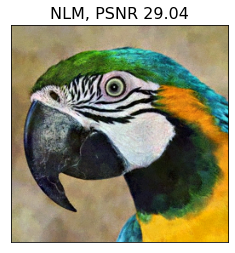

In [218]:
denoised_nlm = np.zeros((256,256,3), 'float')
denoised_nlm[..., 0] = z_slice0_nlm
denoised_nlm[..., 1] = z_slice1_nlm
denoised_nlm[..., 2] = z_slice2_nlm

imgplot = plt.imshow(denoised_nlm)
plt.title("NLM, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_nlm))
plt.xticks([])
plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


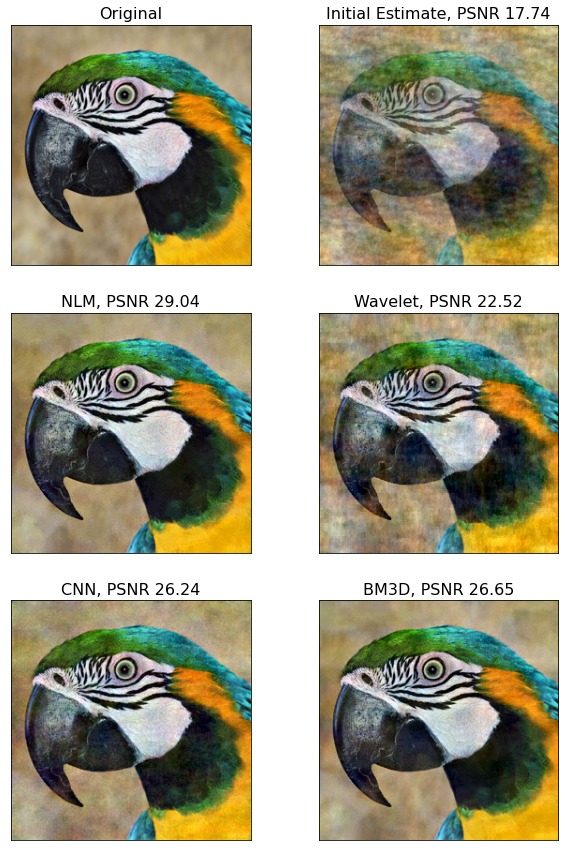

In [245]:
fig = plt.figure(figsize=(3,3))
plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.title.set_text('Original')
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_denoisers/orig.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
plt.imshow(noisy, cmap='gray', vmin=0, vmax=1)
plt.title.set_text("Initial Estimate, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, noisy))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_denoisers/noisy.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
plt.imshow(denoised_nlm, cmap='gray', vmin=0, vmax=1)
plt.title.set_text("NLM, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_nlm))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_denoisers/nlm.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
plt.imshow(denoised_tv, cmap='gray', vmin=0, vmax=1)
plt.title.set_text("Wavelet, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_tv))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_denoisers/tv.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
plt.imshow(denoised_bm3d, cmap='gray', vmin=0, vmax=1)
plt.title.set_text("BM3D, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_bm3d))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_denoisers/bm3d.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

fig = plt.figure(figsize=(3,3))
plt.imshow(denoised_cnn, cmap='gray', vmin=0, vmax=1)
plt.title.set_text("CNN, PSNR %.2f" % peak_signal_noise_ratio(img[...,0:3].astype('float')/256, denoised_cnn))
plt.xticks([])
plt.yticks([])
plt.savefig("./figures/csmri/compare_denoisers/cnn.eps", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [ ]:
with open('fig3.pkl', 'wb') as f:  
    pickle.dump([params, z_SVRG_nlm, z_SVRG_tv, z_SVRG_bm3d, z_SVRG_cnn], f)